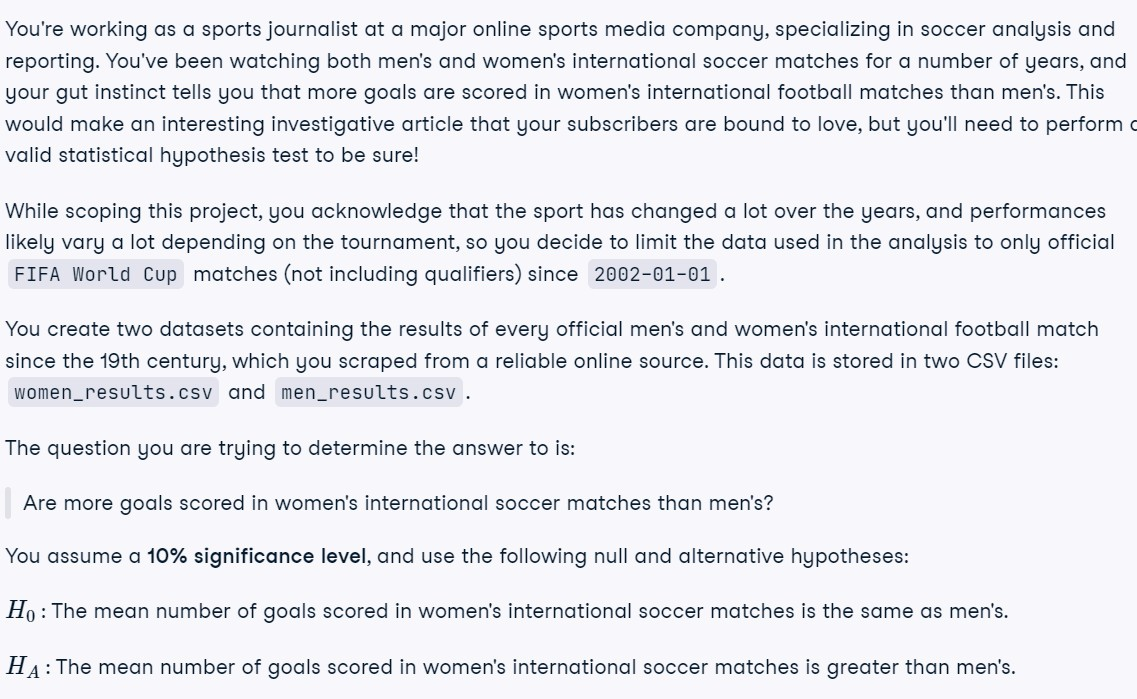

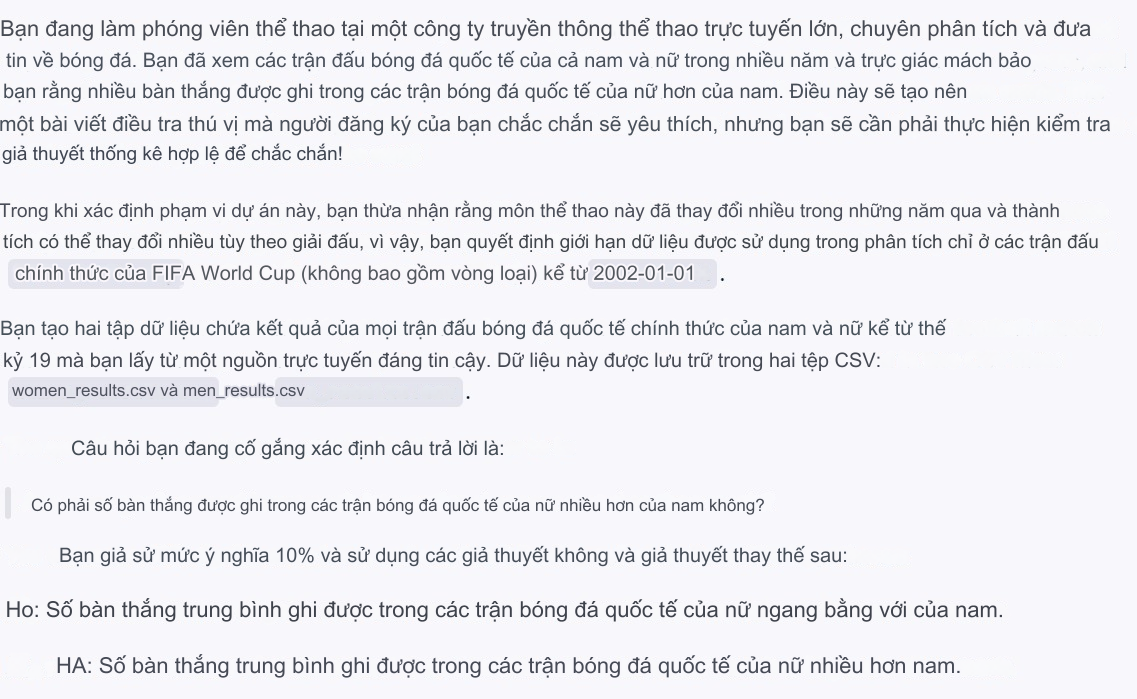

In [60]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import t
from scipy.stats import rankdata
import os
from IPython.display import clear_output
from scipy.stats import mannwhitneyu
import pingouin

In [11]:
men_results = pd.read_csv('men_results.csv')
women_results = pd.read_csv('women_results.csv')


In [12]:
from scipy.stats import norm


In [13]:
men_results.head()

,Unnamed: 0,date,home_team,away_team,home_score,away_score,tournament
0,0,1872-11-30,Scotland,England,0,0,Friendly
1,1,1873-03-08,England,Scotland,4,2,Friendly
2,2,1874-03-07,Scotland,England,2,1,Friendly
3,3,1875-03-06,England,Scotland,2,2,Friendly
4,4,1876-03-04,Scotland,England,3,0,Friendly


In [14]:
women_results.head()

,Unnamed: 0,date,home_team,away_team,home_score,away_score,tournament
0,0,1969-11-01,Italy,France,1,0,Euro
1,1,1969-11-01,Denmark,England,4,3,Euro
2,2,1969-11-02,England,France,2,0,Euro
3,3,1969-11-02,Italy,Denmark,3,1,Euro
4,4,1975-08-25,Thailand,Australia,3,2,AFC Championship


In [15]:
men_FIFA = men_results[men_results.tournament == 'FIFA World Cup']
won_FIFA = women_results[women_results.tournament == 'FIFA World Cup']

In [16]:
# 1969-11-01 lay tu >=2002-01-01.
men_FIFA = men_FIFA[men_FIFA.date >= '2002-01-01']  
# men_FIFA = men_FIFA.query("date >= '2002-01-01' ")

won_FIFA = won_FIFA[won_FIFA.date >= '2002-01-01    ']




In [17]:
men_FIFA.head(5)


,Unnamed: 0,date,home_team,away_team,home_score,away_score,tournament
25164,25164,2002-05-31,France,Senegal,0,1,FIFA World Cup
25165,25165,2002-06-01,Germany,Saudi Arabia,8,0,FIFA World Cup
25166,25166,2002-06-01,Republic of Ireland,Cameroon,1,1,FIFA World Cup
25167,25167,2002-06-01,Uruguay,Denmark,1,2,FIFA World Cup
25168,25168,2002-06-02,Argentina,Nigeria,1,0,FIFA World Cup


In [18]:
won_FIFA.head(5)

,Unnamed: 0,date,home_team,away_team,home_score,away_score,tournament
1600,1600,2003-09-20,Nigeria,North Korea,0,3,FIFA World Cup
1601,1601,2003-09-20,Norway,France,2,0,FIFA World Cup
1602,1602,2003-09-20,Germany,Canada,4,1,FIFA World Cup
1603,1603,2003-09-20,Japan,Argentina,6,0,FIFA World Cup
1604,1604,2003-09-21,United States,Sweden,3,1,FIFA World Cup


In [19]:
# so tran da cua nam
men_FIFA['Tong so tran' ] = men_FIFA['home_score'] + men_FIFA['away_score']
# so tran da cua nu
won_FIFA['Tong so tran' ] = won_FIFA['home_score'] + won_FIFA['away_score']


In [20]:
men_FIFA.head(5)


,Unnamed: 0,date,home_team,away_team,home_score,away_score,tournament,Tong so tran
25164,25164,2002-05-31,France,Senegal,0,1,FIFA World Cup,1
25165,25165,2002-06-01,Germany,Saudi Arabia,8,0,FIFA World Cup,8
25166,25166,2002-06-01,Republic of Ireland,Cameroon,1,1,FIFA World Cup,2
25167,25167,2002-06-01,Uruguay,Denmark,1,2,FIFA World Cup,3
25168,25168,2002-06-02,Argentina,Nigeria,1,0,FIFA World Cup,1


In [21]:
won_FIFA.head(5)

,Unnamed: 0,date,home_team,away_team,home_score,away_score,tournament,Tong so tran
1600,1600,2003-09-20,Nigeria,North Korea,0,3,FIFA World Cup,3
1601,1601,2003-09-20,Norway,France,2,0,FIFA World Cup,2
1602,1602,2003-09-20,Germany,Canada,4,1,FIFA World Cup,5
1603,1603,2003-09-20,Japan,Argentina,6,0,FIFA World Cup,6
1604,1604,2003-09-21,United States,Sweden,3,1,FIFA World Cup,4


In [22]:
pingouin.mwu(x=won_FIFA["Tong so tran"], y=men_FIFA["Tong so tran"], alternative='greater')


,U-val,alternative,p-val,RBC,CLES
MWU,43273.0,greater,0.005107,-0.126901,0.563451



Có vẻ như bạn đã cung cấp kết quả bài kiểm tra Mann-Whitney U. Dưới đây là bảng phân tích của từng số liệu:

U-val: Đây là thống kê Mann-Whitney U, đo tổng thứ hạng của một trong các mẫu. Nó thường được sử dụng như một phần của các bài kiểm tra thống kê phi tham số như bài kiểm tra Mann-Whitney U để so sánh hai mẫu độc lập.

alternative: Điều này xác định giả thuyết thay thế cho thử nghiệm. Trong trường hợp này, nó "lớn hơn", biểu thị rằng thử nghiệm là một đầu và giả thuyết thay thế cho thấy các giá trị trong một nhóm lớn hơn các giá trị trong nhóm kia.

p-val: Đây là giá trị p liên quan đến thử nghiệm. Nó thể hiện xác suất quan sát được một thống kê kiểm tra ở mức cực đoan hoặc cực đoan hơn so với dữ liệu được tính toán từ dữ liệu mẫu, giả định rằng giả thuyết không (thường nêu rõ không có sự khác biệt giữa các nhóm) là đúng. Trong trường hợp này, giá trị p là 0,005107, thấp hơn mức ý nghĩa điển hình là 0,05, cho thấy ý nghĩa thống kê.

RBC: Đây là viết tắt của Tương quan Bserial Xếp hạng. Đó là thước đo mức độ ảnh hưởng của bài kiểm tra Mann-Whitney U, cho thấy cường độ và chiều hướng của mối quan hệ giữa hai nhóm được so sánh. Giá trị âm cho thấy mối quan hệ tiêu cực.

CLES: CLES là viết tắt của Kích thước hiệu ứng ngôn ngữ chung. Đó là một thước đo khác về quy mô hiệu ứng, biểu thị xác suất mà một giá trị được chọn ngẫu nhiên từ một nhóm sẽ lớn hơn giá trị được chọn ngẫu nhiên từ nhóm kia. Trong trường hợp này, nó là 0,563451, biểu thị kích thước hiệu ứng vừa phải.

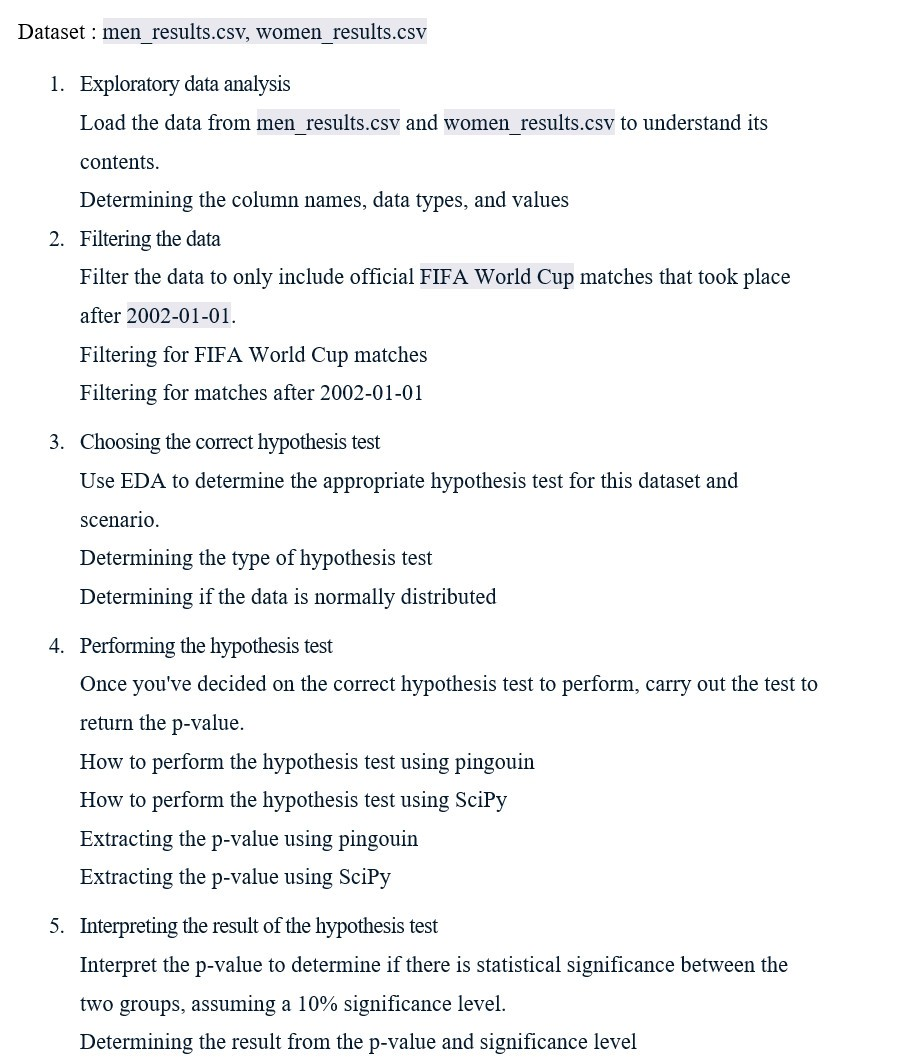

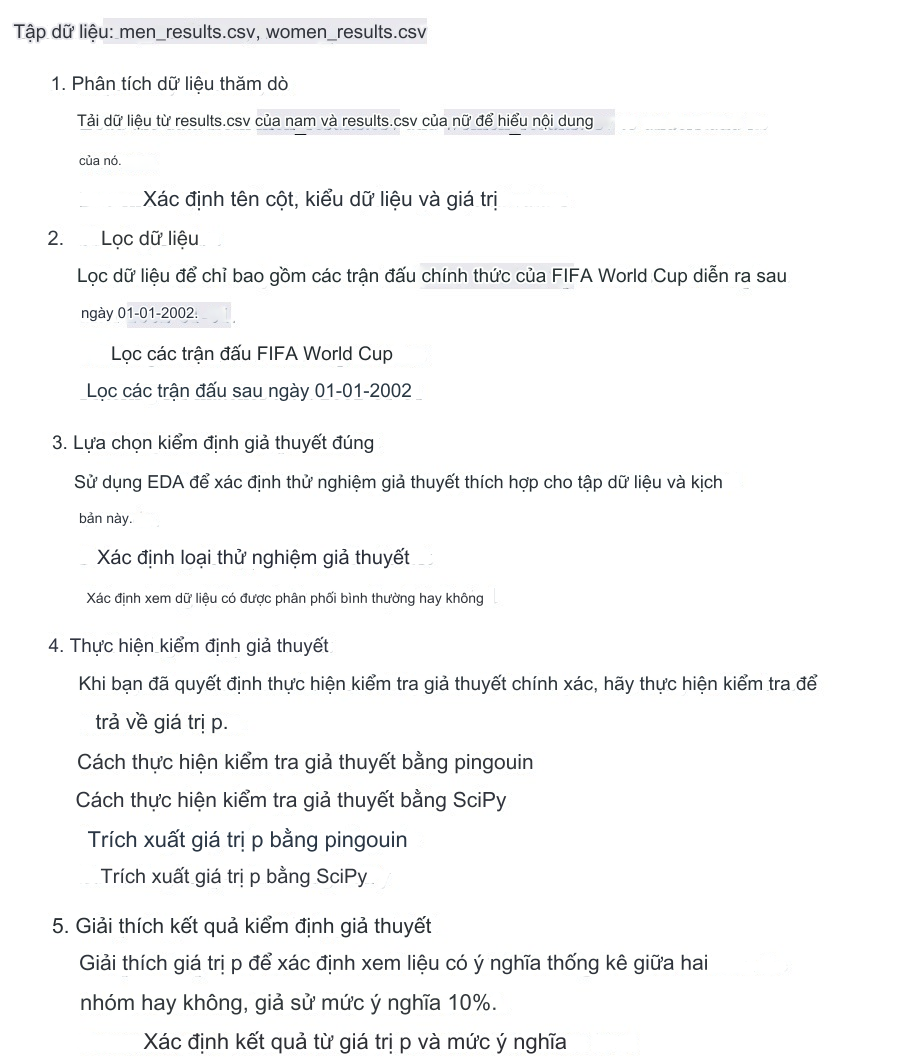

In [23]:
men_results.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44353 entries, 0 to 44352
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  44353 non-null  int64 
 1   date        44353 non-null  object
 2   home_team   44353 non-null  object
 3   away_team   44353 non-null  object
 4   home_score  44353 non-null  int64 
 5   away_score  44353 non-null  int64 
 6   tournament  44353 non-null  object
dtypes: int64(3), object(4)
memory usage: 2.4+ MB


In [24]:
men_results.columns

Index(['Unnamed: 0', 'date', 'home_team', 'away_team', 'home_score',
       'away_score', 'tournament'],
      dtype='object')

In [25]:
women_results.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4884 entries, 0 to 4883
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  4884 non-null   int64 
 1   date        4884 non-null   object
 2   home_team   4884 non-null   object
 3   away_team   4884 non-null   object
 4   home_score  4884 non-null   int64 
 5   away_score  4884 non-null   int64 
 6   tournament  4884 non-null   object
dtypes: int64(3), object(4)
memory usage: 267.2+ KB


In [26]:
women_results.columns

Index(['Unnamed: 0', 'date', 'home_team', 'away_team', 'home_score',
       'away_score', 'tournament'],
      dtype='object')

In [27]:
men_results.head()

,Unnamed: 0,date,home_team,away_team,home_score,away_score,tournament
0,0,1872-11-30,Scotland,England,0,0,Friendly
1,1,1873-03-08,England,Scotland,4,2,Friendly
2,2,1874-03-07,Scotland,England,2,1,Friendly
3,3,1875-03-06,England,Scotland,2,2,Friendly
4,4,1876-03-04,Scotland,England,3,0,Friendly


In [28]:
women_results.head()


,Unnamed: 0,date,home_team,away_team,home_score,away_score,tournament
0,0,1969-11-01,Italy,France,1,0,Euro
1,1,1969-11-01,Denmark,England,4,3,Euro
2,2,1969-11-02,England,France,2,0,Euro
3,3,1969-11-02,Italy,Denmark,3,1,Euro
4,4,1975-08-25,Thailand,Australia,3,2,AFC Championship


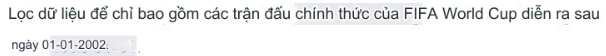

In [29]:
nam_FIFA = men_results[men_results.tournament == 'FIFA World Cup']
nam_FIFA_date = nam_FIFA[nam_FIFA.date >= '2002-01-01']
nam_FIFA_date

,Unnamed: 0,date,home_team,away_team,home_score,away_score,tournament
25164,25164,2002-05-31,France,Senegal,0,1,FIFA World Cup
25165,25165,2002-06-01,Germany,Saudi Arabia,8,0,FIFA World Cup
25166,25166,2002-06-01,Republic of Ireland,Cameroon,1,1,FIFA World Cup
25167,25167,2002-06-01,Uruguay,Denmark,1,2,FIFA World Cup
25168,25168,2002-06-02,Argentina,Nigeria,1,0,FIFA World Cup
...,...,...,...,...,...,...,...
44343,44343,2022-12-10,England,France,1,2,FIFA World Cup
44345,44345,2022-12-13,Argentina,Croatia,3,0,FIFA World Cup
44346,44346,2022-12-14,France,Morocco,2,0,FIFA World Cup
44350,44350,2022-12-17,Croatia,Morocco,2,1,FIFA World Cup


In [30]:
nu_FIFA = women_results[women_results.tournament == 'FIFA World Cup']
# and 
nu_FIFA_date = nu_FIFA[nu_FIFA.date >= '2002-01-01']
nu_FIFA_date




,Unnamed: 0,date,home_team,away_team,home_score,away_score,tournament
1600,1600,2003-09-20,Nigeria,North Korea,0,3,FIFA World Cup
1601,1601,2003-09-20,Norway,France,2,0,FIFA World Cup
1602,1602,2003-09-20,Germany,Canada,4,1,FIFA World Cup
1603,1603,2003-09-20,Japan,Argentina,6,0,FIFA World Cup
1604,1604,2003-09-21,United States,Sweden,3,1,FIFA World Cup
...,...,...,...,...,...,...,...
4465,4465,2019-06-29,Germany,Sweden,1,2,FIFA World Cup
4466,4466,2019-07-02,England,United States,1,2,FIFA World Cup
4467,4467,2019-07-03,Netherlands,Sweden,1,0,FIFA World Cup
4468,4468,2019-07-06,England,Sweden,1,2,FIFA World Cup


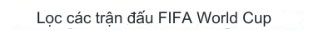

In [31]:
nam_FIFA.head(5)

,Unnamed: 0,date,home_team,away_team,home_score,away_score,tournament
1311,1311,1930-07-13,Belgium,United States,0,3,FIFA World Cup
1312,1312,1930-07-13,France,Mexico,4,1,FIFA World Cup
1313,1313,1930-07-14,Brazil,Yugoslavia,1,2,FIFA World Cup
1314,1314,1930-07-14,Peru,Romania,1,3,FIFA World Cup
1315,1315,1930-07-15,Argentina,France,1,0,FIFA World Cup


In [32]:
nu_FIFA.head(5)

,Unnamed: 0,date,home_team,away_team,home_score,away_score,tournament
429,429,1991-11-16,China PR,Norway,4,0,FIFA World Cup
430,430,1991-11-17,Denmark,New Zealand,3,0,FIFA World Cup
431,431,1991-11-17,Japan,Brazil,0,1,FIFA World Cup
432,432,1991-11-17,Sweden,United States,2,3,FIFA World Cup
433,433,1991-11-17,Germany,Nigeria,4,0,FIFA World Cup


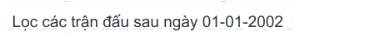

In [33]:
men_results[men_results.date >= '2002-01-01']

,Unnamed: 0,date,home_team,away_team,home_score,away_score,tournament
24863,24863,2002-01-04,Bahrain,Finland,0,2,Prime Minister's Cup
24864,24864,2002-01-04,Egypt,Ghana,2,0,Friendly
24865,24865,2002-01-04,Martinique,Guadeloupe,1,3,Friendly
24866,24866,2002-01-05,Albania,North Macedonia,0,0,Prime Minister's Cup
24867,24867,2002-01-05,Kuwait,Zimbabwe,3,0,Friendly
...,...,...,...,...,...,...,...
44348,44348,2022-12-14,Thailand,Taiwan,0,1,Friendly
44349,44349,2022-12-14,Vietnam,Philippines,1,0,Friendly
44350,44350,2022-12-17,Croatia,Morocco,2,1,FIFA World Cup
44351,44351,2022-12-17,Singapore,Maldives,3,1,Friendly


In [34]:
women_results[women_results.date >= '2002-01-01']

,Unnamed: 0,date,home_team,away_team,home_score,away_score,tournament
1365,1365,2002-01-23,Norway,United States,1,0,Four Nations Tournament
1366,1366,2002-01-23,China PR,Germany,2,1,Four Nations Tournament
1367,1367,2002-01-25,Germany,United States,0,0,Four Nations Tournament
1368,1368,2002-01-25,China PR,Norway,0,3,Four Nations Tournament
1369,1369,2002-01-27,Germany,Norway,3,1,Four Nations Tournament
...,...,...,...,...,...,...,...
4879,4879,2022-07-22,Sweden,Belgium,1,0,UEFA Euro
4880,4880,2022-07-23,France,Netherlands,1,0,UEFA Euro
4881,4881,2022-07-26,England,Sweden,4,0,UEFA Euro
4882,4882,2022-07-27,Germany,France,2,1,UEFA Euro


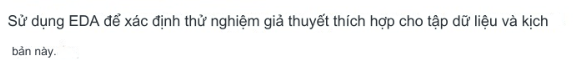

In [35]:
men_FIFA.head(5)

,Unnamed: 0,date,home_team,away_team,home_score,away_score,tournament,Tong so tran
25164,25164,2002-05-31,France,Senegal,0,1,FIFA World Cup,1
25165,25165,2002-06-01,Germany,Saudi Arabia,8,0,FIFA World Cup,8
25166,25166,2002-06-01,Republic of Ireland,Cameroon,1,1,FIFA World Cup,2
25167,25167,2002-06-01,Uruguay,Denmark,1,2,FIFA World Cup,3
25168,25168,2002-06-02,Argentina,Nigeria,1,0,FIFA World Cup,1


In [36]:

won_FIFA.head(5)


,Unnamed: 0,date,home_team,away_team,home_score,away_score,tournament,Tong so tran
1600,1600,2003-09-20,Nigeria,North Korea,0,3,FIFA World Cup,3
1601,1601,2003-09-20,Norway,France,2,0,FIFA World Cup,2
1602,1602,2003-09-20,Germany,Canada,4,1,FIFA World Cup,5
1603,1603,2003-09-20,Japan,Argentina,6,0,FIFA World Cup,6
1604,1604,2003-09-21,United States,Sweden,3,1,FIFA World Cup,4


In [37]:
men_results['So tran thang mau'] =  men_results['home_score'] > men_results['away_score']

In [38]:
women_results['So tran thang mau'] =  women_results['home_score'] > women_results['away_score']

In [39]:
women_results.head(5)

,Unnamed: 0,date,home_team,away_team,home_score,away_score,tournament,So tran thang mau
0,0,1969-11-01,Italy,France,1,0,Euro,True
1,1,1969-11-01,Denmark,England,4,3,Euro,True
2,2,1969-11-02,England,France,2,0,Euro,True
3,3,1969-11-02,Italy,Denmark,3,1,Euro,True
4,4,1975-08-25,Thailand,Australia,3,2,AFC Championship,True


In [40]:
men_results.head(5)

,Unnamed: 0,date,home_team,away_team,home_score,away_score,tournament,So tran thang mau
0,0,1872-11-30,Scotland,England,0,0,Friendly,False
1,1,1873-03-08,England,Scotland,4,2,Friendly,True
2,2,1874-03-07,Scotland,England,2,1,Friendly,True
3,3,1875-03-06,England,Scotland,2,2,Friendly,False
4,4,1876-03-04,Scotland,England,3,0,Friendly,True


In [41]:
# dem so tran thang mau la true khong sai value count
a = men_results[men_results['So tran thang mau'] == True].value_counts()
a.count()

21606

In [42]:
# dem so tran thang mau la true khong sai value count
b = women_results[women_results['So tran thang mau'] == True].value_counts()
b.count()

2565

In [43]:
#  gia tri trung binh cua mau, nam
# so dong
tb_mau_nam = a.count() / men_results.shape[0]
tb_mau_nam

0.48713728496381303

In [44]:
tb_mau_nu = b.count() / women_results.shape[0]
tb_mau_nu

0.5251842751842751

In [45]:
men_FIFA

,Unnamed: 0,date,home_team,away_team,home_score,away_score,tournament,Tong so tran
25164,25164,2002-05-31,France,Senegal,0,1,FIFA World Cup,1
25165,25165,2002-06-01,Germany,Saudi Arabia,8,0,FIFA World Cup,8
25166,25166,2002-06-01,Republic of Ireland,Cameroon,1,1,FIFA World Cup,2
25167,25167,2002-06-01,Uruguay,Denmark,1,2,FIFA World Cup,3
25168,25168,2002-06-02,Argentina,Nigeria,1,0,FIFA World Cup,1
...,...,...,...,...,...,...,...,...
44343,44343,2022-12-10,England,France,1,2,FIFA World Cup,3
44345,44345,2022-12-13,Argentina,Croatia,3,0,FIFA World Cup,3
44346,44346,2022-12-14,France,Morocco,2,0,FIFA World Cup,2
44350,44350,2022-12-17,Croatia,Morocco,2,1,FIFA World Cup,3


In [46]:
men_FIFA['So tran thang'] = men_FIFA['home_score'] > men_FIFA['away_score']



In [47]:
c = men_FIFA[men_FIFA['So tran thang'] == True].value_counts()
c.count()
tb__quanthe_fifa_nam = c.count() / men_FIFA.shape[0]
tb__quanthe_fifa_nam

0.4348958333333333

In [48]:
# do lech chuan men_FIFA[men_FIFA['Tong so tran']].std()
men_FIFA

,Unnamed: 0,date,home_team,away_team,home_score,away_score,tournament,Tong so tran,So tran thang
25164,25164,2002-05-31,France,Senegal,0,1,FIFA World Cup,1,False
25165,25165,2002-06-01,Germany,Saudi Arabia,8,0,FIFA World Cup,8,True
25166,25166,2002-06-01,Republic of Ireland,Cameroon,1,1,FIFA World Cup,2,False
25167,25167,2002-06-01,Uruguay,Denmark,1,2,FIFA World Cup,3,False
25168,25168,2002-06-02,Argentina,Nigeria,1,0,FIFA World Cup,1,True
...,...,...,...,...,...,...,...,...,...
44343,44343,2022-12-10,England,France,1,2,FIFA World Cup,3,False
44345,44345,2022-12-13,Argentina,Croatia,3,0,FIFA World Cup,3,True
44346,44346,2022-12-14,France,Morocco,2,0,FIFA World Cup,2,True
44350,44350,2022-12-17,Croatia,Morocco,2,1,FIFA World Cup,3,True


In [49]:
# So tran thang cua nu
won_FIFA['So tran thang'] = won_FIFA['home_score'] > won_FIFA['away_score']


In [50]:
d = won_FIFA[won_FIFA['So tran thang'] == True].value_counts()
d.count()
tb__quanthe_fifa_nu= d.count() / won_FIFA.shape[0]
tb__quanthe_fifa_nu

0.54

In [51]:
dlc_men = men_FIFA['Tong so tran'].std()

In [52]:
dlc_won = won_FIFA['Tong so tran'].std()

In [53]:
z_men = ((tb__quanthe_fifa_nam - tb_mau_nam  ) / dlc_men) / np.sqrt(men_FIFA.value_counts().count())
z_men

-0.0016132314670245604

In [54]:
z_won = ((tb__quanthe_fifa_nu - tb_mau_nu) / dlc_won) / np.sqrt(won_FIFA.value_counts().count())
z_won

0.0005180164879704907

In [55]:
# tinh p(z>z_men)
p_value_nam = norm.sf(z_men)
p_value_nam

0.500643585961113

In [56]:
p_value_nu = norm.sf(z_won)
p_value_nu

0.499793341330246

# p_value_nam > 0.1 => chap nhan Ho

In [57]:

# EDA 
# 1. So tran thang cua nam va nu
# 2. So tran thua cua nam va nu

# 1. So tran thang cua nam va nu
# So tran thang cua nam
men_FIFA['So tran thang'] = men_FIFA['home_score'] > men_FIFA['away_score']



In [68]:
men_FIFA.head(5)

,Unnamed: 0,date,home_team,away_team,home_score,away_score,tournament,Tong so tran,So tran thang
25164,25164,2002-05-31,France,Senegal,0,1,FIFA World Cup,1,False
25165,25165,2002-06-01,Germany,Saudi Arabia,8,0,FIFA World Cup,8,True
25166,25166,2002-06-01,Republic of Ireland,Cameroon,1,1,FIFA World Cup,2,False
25167,25167,2002-06-01,Uruguay,Denmark,1,2,FIFA World Cup,3,False
25168,25168,2002-06-02,Argentina,Nigeria,1,0,FIFA World Cup,1,True


# câu 3

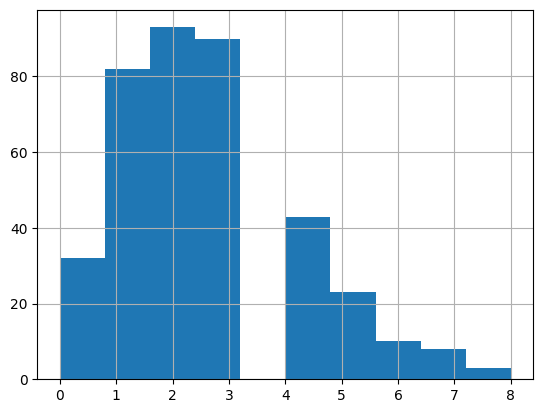

<Figure size 640x480 with 0 Axes>

In [72]:
men_FIFA['Tong so tran'].hist() 
plt.show()
plt.clf()


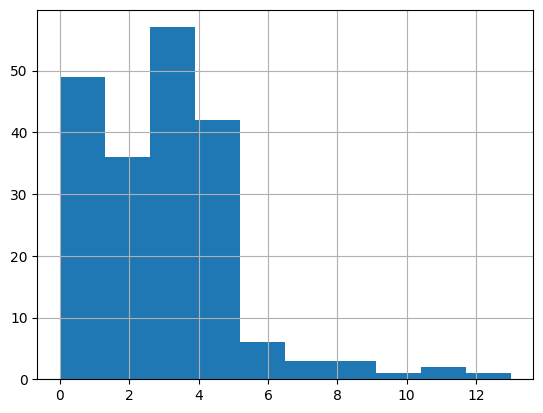

<Figure size 640x480 with 0 Axes>

In [73]:
won_FIFA['Tong so tran'].hist() 
plt.show()
plt.clf()
